# Random Forests

```{admonition} Lernziele
:class: important
* Sie wissen, was ein **Random Forest** ist.
```

## Viele Bäume sind ein Wald

Entscheidungsbäume sind aufgrund ihrer Einfachheit und vor allem aufgrund ihrer
Interpretierbarkeit sehr beliebt. Allerdings ist ihre Tendenz zum Overfitting
problematisch. Die Idee des ML-Verfahrens Random Forests ist es, viele
Entscheidungsbäume zu erstellen und sie beispielsweise durch Mittelwertbildung
zusammenzufassen. Wenn sich ein einzelner Entscheidungsbaum zu sehr an die
Trainingsdaten angepasst haben sollte, wird das sozusagen durch die
Mittelwertbildung mit einem anderen Entscheidungsbaum, der mit anderen
Trainingsdaten trainiert wurde, wieder ausgeglichen. Dabei wird werden die
Trainigsdaten für jeden Entscheidungsbaum zufällig ausgewählt.

## Wie werden die Trainingsdaten zufällig ausgewählt?

Es gibt verschiedene Methoden, mit denen die Trainingsdaten beim Training eines
Random Forests zufällig ausgewählt werden können:

1. Bootstrapping: Dies ist die gängigste Methode zur Auswahl der Trainingsdaten
für jeden Entscheidungsbaum in einem Random Forest. Dabei werden einzelne
Datenpunkte aus der Menge der Trainignsdaten zufällig ausgewählt, jedoch sofort
wieder zurückgelegt. Dadurch können Datenpunkte auch mehrfach auftauchen,
während andere Datenpunkte vielleicht gar nicht zum Training des
Entscheidungsbaumes genutzt werden.

2. Stratifiziertes Sampling: Bei dieser Methode werden die Trainingsdaten anhand
eines Kriteriums in verschiedene "Schichten" eingeteilt, aus denen dann zufällig
eine Teilmenge von Beispielen ausgewählt wird. Dies kann nützlich sein, wenn die
Trainingsdaten unausgewogen sind, d. h. es gibt deutlich mehr Beispiele für eine
Klasse als für die andere. Das Stratified Sampling kann dazu beitragen, dass
jeder Baum im Random Forest auf einer repräsentativen Stichprobe der Daten
trainiert wird.

3. Cluster-Stichproben: Bei dieser Methode werden die Trainingsdaten in separate
Cluster unterteilt und dann eine Teilmenge der Cluster zufällig ausgewählt, die
für das Training verwendet wird. Dies kann nützlich sein, wenn die
Trainingsdaten auf natürliche Weise in verschiedene Cluster unterteilt sind und
Sie sicherstellen möchten, dass jeder Baum im Random Forest auf einer
repräsentativen Stichprobe der Daten trainiert wird.

Es gibt auch andere Methoden, die zur zufälligen Auswahl der Trainingsdaten
verwendet werden können, wie z. B. das systematische Sampling, bei dem Beispiele
in regelmäßigen Abständen aus dem Trainingssatz ausgewählt werden, und das
einfache Zufallsstichprobenverfahren, bei dem Beispiele ohne Ersetzung zufällig
ausgewählt werden. Die Wahl der Methode hängt von den Besonderheiten der Daten
und den Zielen des Modells ab.

## Bootstraping in Scikit-Learn

Für die nachfolgenden Erläuterungen generieren wir uns wieder einmal künstliche
Messdaten. Diesmal verwenden wir die Funktion `make_moons` von Scikit-Learn.

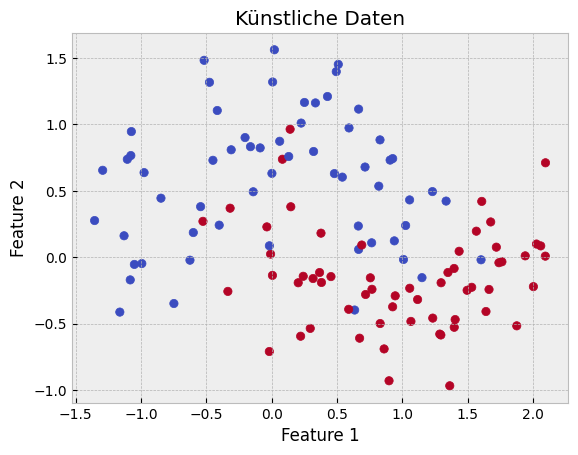

In [1]:
from sklearn.datasets import make_moons
import matplotlib.pylab as plt; plt.style.use('bmh')

# generate artificial data
X, y = make_moons(n_samples=120, random_state=0, noise=0.3)

# plot artificial data
fig, ax = plt.subplots()
ax.scatter(X[:,0], X[:,1], c=y, cmap='coolwarm')
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_title('Künstliche Daten');

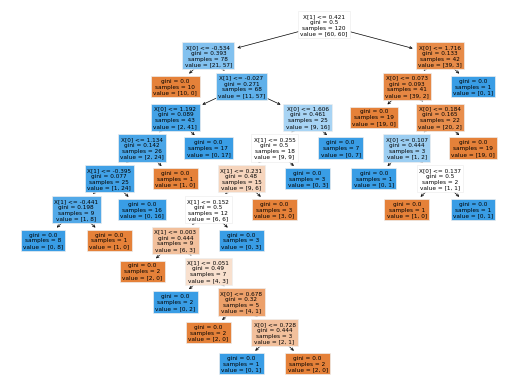

In [2]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(X,y);

import matplotlib.pylab as plt
from sklearn.tree import plot_tree 

plt.figure()
plot_tree(model, filled=True)
plt.show()

Das Ergebnis ist ein Entscheidungsbaum mit vielen Entscheidungen. Wir erzeugen jetzt ein Gitter

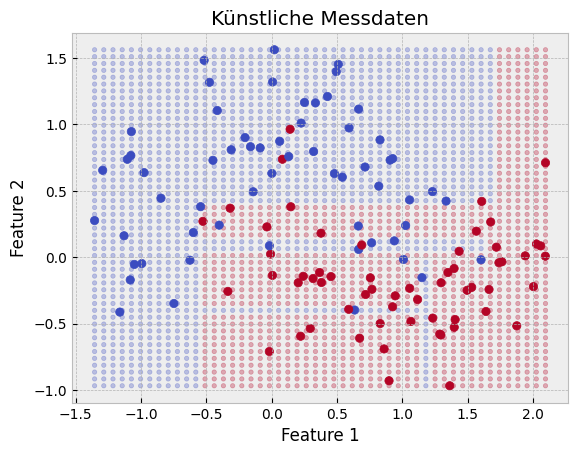

In [3]:
x0_min = X[:,0].min()
x0_max = X[:,0].max()
x1_min = X[:,1].min()
x1_max = X[:,1].max()

import numpy as np
gitter_x1, gitter_x2 = np.meshgrid(np.linspace(x0_min, x0_max), np.linspace(x1_min, x1_max))
gitter_y = model.predict(np.stack([gitter_x1.ravel(),gitter_x2.ravel()]).T)

fig, ax = plt.subplots()
ax.scatter(gitter_x1, gitter_x2, c=gitter_y, s=10, cmap='coolwarm', alpha=0.3)
ax.scatter(X[:,0], X[:,1], c=y, cmap='coolwarm')
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_title('Künstliche Messdaten');

Jetzt lassen wir einen Random Forest erzeugen. Weitere Details finden Sie unter
[Scikit-Learn Dokumentation →
RandomForestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html).
Zunächst erfolgt der übliche Import. Bei der Instanziierung müssen wir jedoch
diesmal angeben, aus wie vielen Entscheidungsbäumen der Random Forest bestehen
zoll. Dazu nutzen wir das Argument `n_estimators=`. 

Wir wählen 4 Entscheidungsbäume. Die Auswahl der Daten für jeden
Entscheidungsbaum erfolgt zufällig. Damit aus didaktischen Gründen die
Ergebnisse produzierbar sind, fixieren wir den Seed für den
Zufallszahlengenerator.

In [4]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=4, random_state=0)
model.fit(X,y)

RandomForestClassifier(n_estimators=4, random_state=0)

Die vier erzeugten Entscheidungsbäume sind in der Variable `model` gespeichert.

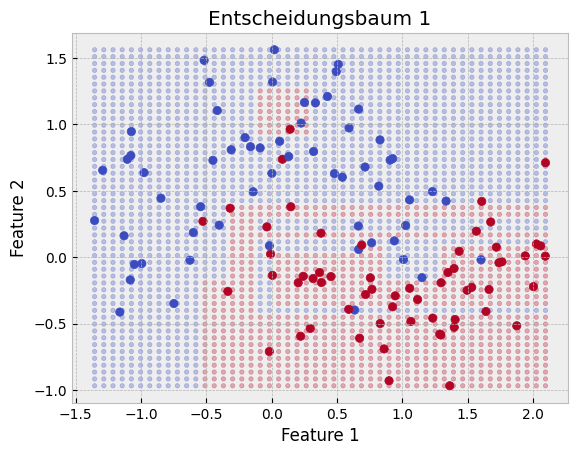

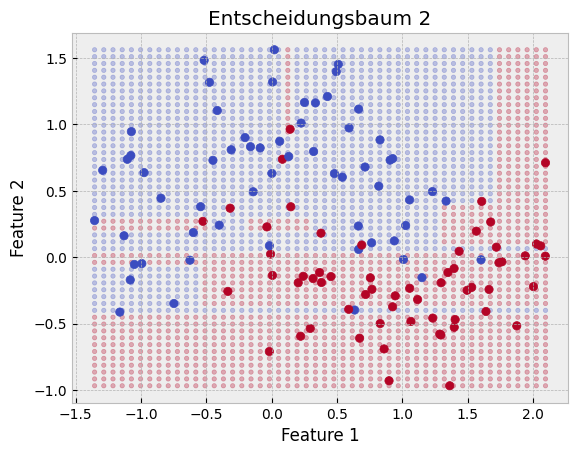

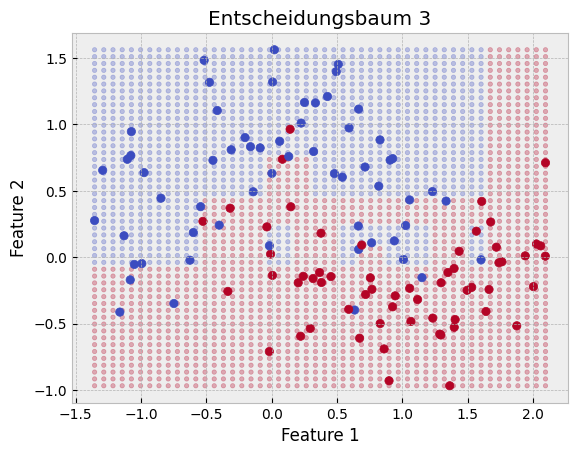

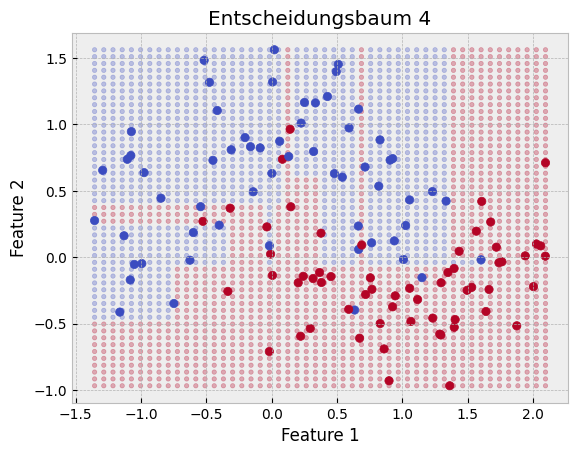

In [5]:
for (nummer, baum) in zip(range(4), model.estimators_):
    gitter_y = baum.predict(np.stack([gitter_x1.ravel(),gitter_x2.ravel()]).T)

    fig, ax = plt.subplots()
    ax.scatter(gitter_x1, gitter_x2, c=gitter_y, s=10, cmap='coolwarm', alpha=0.3)
    ax.scatter(X[:,0], X[:,1], c=y, cmap='coolwarm')
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    ax.set_title('Entscheidungsbaum {}'.format(nummer+1));

Insgesamt erhalten wir:

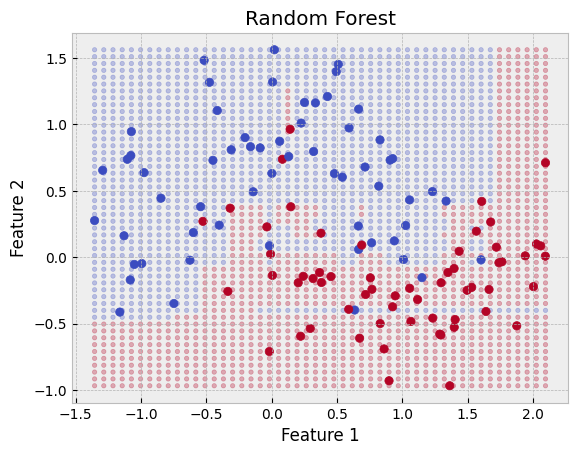

In [6]:
gitter_y = model.predict(np.stack([gitter_x1.ravel(),gitter_x2.ravel()]).T)

fig, ax = plt.subplots()
ax.scatter(gitter_x1, gitter_x2, c=gitter_y, s=10, cmap='coolwarm', alpha=0.3)
ax.scatter(X[:,0], X[:,1], c=y, cmap='coolwarm')
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_title('Random Forest');

## Zusammenfassung

Random Forests sind einfachen Entscheidungsbäumen vorzuziehen, da sie das
Overfitting reduzieren. Die Erzeugung der einzelnen Entscheidungsbäume kann
parallelisiert werden, so dass das Training eines Random Forests sehr schnell
durchgeführt werden kann. Auch für große Datenmengen mit sehr unterschiedlichen
Eigenschaften arbeitet der Random Forest sehr effizient. Er ermöglicht auch eine
Interpreation, welche Eigenschaften ggf. einen größeren Einfluss haben als
andere Eigenschaften.